In [ ]:
# auto-mpg.cav 파일을 읽어서
# 컬러명 지정
# 데이터 정보 확인
# 누락 데이터 처리 -> 삭제
# weight 와 mpg 의 scatter 그래프 작성
# 제조국가별로 mpg를 boxplot 으로 표현
# 중복 데이터 제거 (행 제거)
# 제조국가 1: usa 2: eu 3 jpn 컬럼의 값을 변경

In [21]:
# %load ../font.py
#!/usr/bin/env python

# In[ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import platform

if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



/Users/isang-won/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.0+ KB
누락데이터 삭제 정보 None


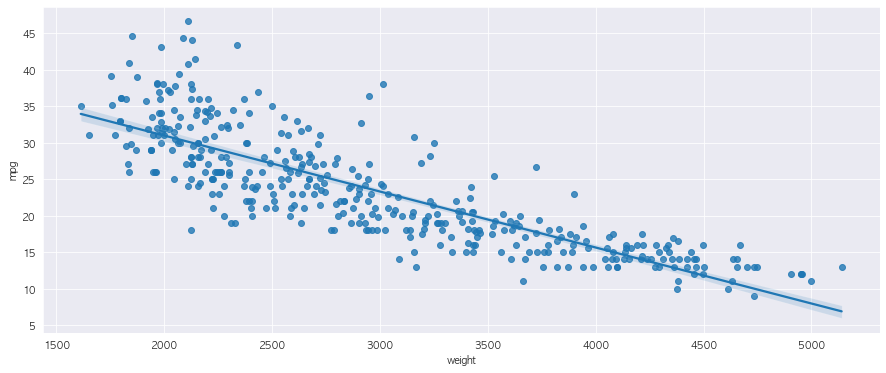

In [28]:
df = pd.read_csv('dataset/auto-mpg.csv')

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# df.info()
df_nan_data = [df.isnull().sum() > 0]
df_nan_data_names = list(df.columns[df_nan_data])
df_nan_data = df.dropna(subset=df_nan_data_names, how='any', axis=0)
print('누락데이터 삭제 정보', df_nan_data.info())
        

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1,1,1)
# ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='weight', y='mpg', data=df, ax=ax1)
# sns.regplot(x='weight', y='mpg', data=df, ax=ax2, fit_reg=False) 


plt.show()



        

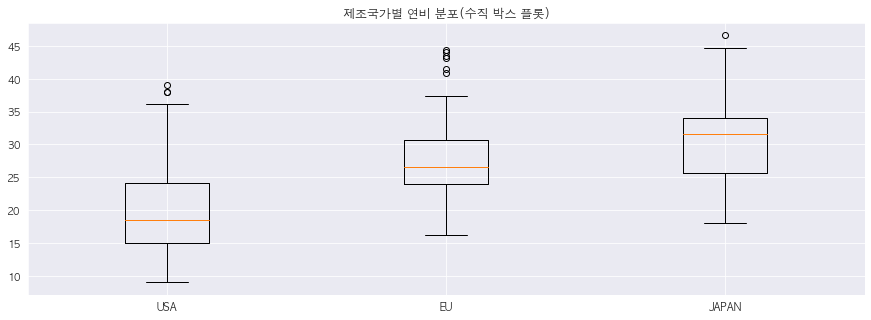

In [29]:

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

# ax2.boxplot(x=[df[df['origin']==1]['mpg'],
#                df[df['origin']==2]['mpg'],
#                df[df['origin']==3]['mpg']], 
#          labels=['USA', 'EU', 'JAPAN'],
#          vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()